<a href="https://colab.research.google.com/github/RamjiMahadevan3/Car-Price-Prediction/blob/main/Copy_of_Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [ ]:
# Step 2: Generate Synthetic Dataset
data = {
    'carbody': np.random.choice(['sedan', 'hatchback', 'wagon', 'convertible', 'hardtop'], 100),
    'compressionratio': np.random.uniform(7.0, 12.0, 100),
    'curbweight': np.random.uniform(1500, 3000, 100),
    'enginesize': np.random.uniform(50, 200, 100),
    'horsepower': np.random.uniform(50, 200, 100),
    'citympg': np.random.uniform(15, 30, 100),
    'highwaympg': np.random.uniform(20, 35, 100),
    'doornumber': np.random.choice([2, 4], 100),
    'aspiration': np.random.choice(['turbo', 'standard'], 100),
    'wheelbase': np.random.uniform(80, 120, 100),
    'carlength': np.random.uniform(150, 200, 100),
    'carwidth': np.random.uniform(60, 80, 100),
    'carheight': np.random.uniform(50, 60, 100),
    'boreratio': np.random.uniform(2.0, 4.0, 100),
    'stroke': np.random.uniform(2.0, 4.0, 100),
    'peakrpm': np.random.uniform(4000, 7000, 100),
    'price': np.random.uniform(5000, 30000, 100)
}

df = pd.DataFrame(data)
df.to_csv('CarPrice.csv', index=False)


In [ ]:
# Step 3: Load and Preprocess Data
df = pd.read_csv('CarPrice.csv')


In [ ]:
# Separate features and target
X = df.drop('price', axis=1)
y = df['price']


In [ ]:
# Define categorical and numerical features
categorical_features = ['carbody', 'doornumber', 'aspiration']
numerical_features = X.columns.difference(categorical_features)


In [ ]:
# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

In [ ]:
# Create the pipeline with preprocessor and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

In [ ]:

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Train the model
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['boreratio', 'carheight', 'carlength', 'carwidth', 'citympg',
       'compressionratio', 'curbweight', 'enginesize', 'highwaympg',
       'horsepower', 'peakrpm', 'stroke', 'wheelbase'],
      dtype='object')),
                                                 ('cat', OneHotEncoder(),
                                                  ['carbody', 'doornumber',
                                                   'aspiration'])])),
                ('model', LinearRegression())])

In [ ]:
# Make predictions
y_pred = pipeline.predict(X_test)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 96092289.98268303


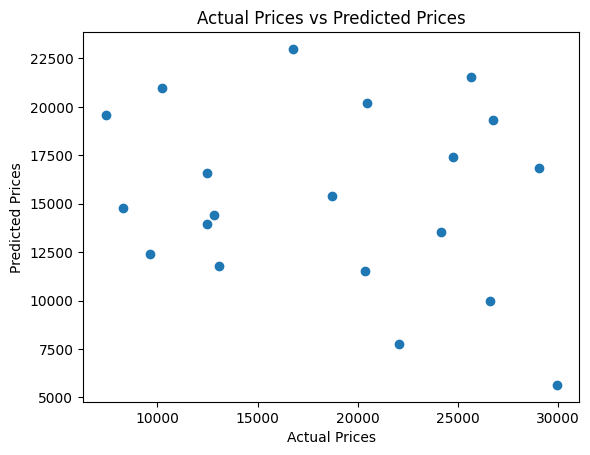

In [ ]:
# Plotting predictions vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()